In [139]:
import pandas as pd 
import numpy as np
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error


In [140]:
data=pd.read_csv(r'C:\Users\Nayee\OneDrive\Desktop\matplotlib\env\study_performance.csv')

In [141]:
data.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [142]:
race=pd.crosstab(index=data['race_ethnicity'],columns='Cout')

In [143]:
race

col_0,Cout
race_ethnicity,
group A,89
group B,190
group C,319
group D,262
group E,140


In [144]:
edu=pd.crosstab(index=data['parental_level_of_education'],columns='Cout')

In [145]:
edu

col_0,Cout
parental_level_of_education,
associate's degree,222
bachelor's degree,118
high school,196
master's degree,59
some college,226
some high school,179


In [146]:
lunc=pd.crosstab(index=data['lunch'],columns='Cout')

In [147]:
test=pd.crosstab(index=data['test_preparation_course'],columns='Cout')

In [148]:
test

col_0,Cout
test_preparation_course,
completed,358
none,642


In [149]:
data['gender']=data['gender'].replace({'male':1,'female':2})
data['lunch']=data['lunch'].replace({'free/reduced':1,'standard':2})
data['race_ethnicity']=data['race_ethnicity'].replace({'group A':1,'group B':2,'group C':3,'group D':4,'group E':5})
data['parental_level_of_education']=data['parental_level_of_education'].replace({
    "associate's degree":1,"bachelor's degree":2,'high school':3,"master's degree":4,
    'some college':5,'some high school':6})
data['test_preparation_course']=data['test_preparation_course'].replace({'completed':1,'none':2})

C:\Users\Nayee\AppData\Local\Temp\ipykernel_11616\2856566590.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data['gender']=data['gender'].replace({'male':1,'female':2})
C:\Users\Nayee\AppData\Local\Temp\ipykernel_11616\2856566590.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data['lunch']=data['lunch'].replace({'free/reduced':1,'standard':2})
C:\Users\Nayee\AppData\Local\Temp\ipykernel_11616\2856566590.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain

In [150]:
data

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,2,2,2,2,2,72,72,74
1,2,3,5,2,1,69,90,88
2,2,2,4,2,2,90,95,93
3,1,1,1,1,2,47,57,44
4,1,3,5,2,2,76,78,75
...,...,...,...,...,...,...,...,...
995,2,5,4,2,1,88,99,95
996,1,3,3,1,2,62,55,55
997,2,3,3,1,1,59,71,65
998,2,4,5,2,1,68,78,77


In [151]:
data['total']=data['reading_score']+data['writing_score']+data['math_score']

In [152]:
data

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total
0,2,2,2,2,2,72,72,74,218
1,2,3,5,2,1,69,90,88,247
2,2,2,4,2,2,90,95,93,278
3,1,1,1,1,2,47,57,44,148
4,1,3,5,2,2,76,78,75,229
...,...,...,...,...,...,...,...,...,...
995,2,5,4,2,1,88,99,95,282
996,1,3,3,1,2,62,55,55,172
997,2,3,3,1,1,59,71,65,195
998,2,4,5,2,1,68,78,77,223


In [153]:
data.isna().sum()

gender                         0
race_ethnicity                 0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
total                          0
dtype: int64

In [154]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column                       Non-Null Count  Dtype
---  ------                       --------------  -----
 0   gender                       1000 non-null   int64
 1   race_ethnicity               1000 non-null   int64
 2   parental_level_of_education  1000 non-null   int64
 3   lunch                        1000 non-null   int64
 4   test_preparation_course      1000 non-null   int64
 5   math_score                   1000 non-null   int64
 6   reading_score                1000 non-null   int64
 7   writing_score                1000 non-null   int64
 8   total                        1000 non-null   int64
dtypes: int64(9)
memory usage: 70.4 KB


In [155]:
X=data.drop(columns=['total'])
y=data['total']

In [159]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Split the dataset into features (X) and target variable (y)
X = data.drop(columns=['total'])
y = data['total']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1)

# Fit the OLS regression model to the training data
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r_squared = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R-squared:", r_squared)
model.coef_


Mean Squared Error: 3.0655765865612695e-27
R-squared: 1.0


array([-1.16901534e-15, -9.10382880e-15, -5.87203897e-16,  6.13745166e-15,
       -9.69702292e-15,  1.00000000e+00,  1.00000000e+00,  1.00000000e+00])

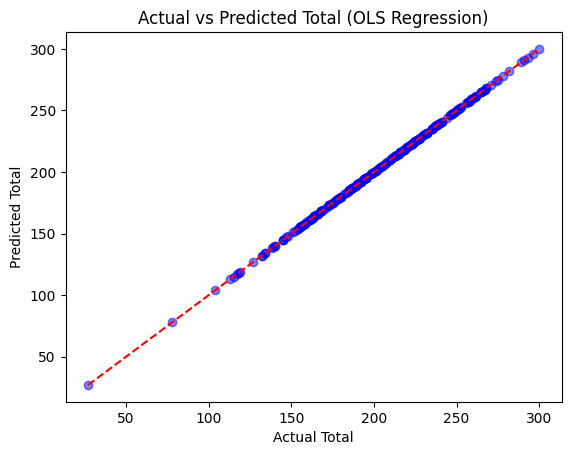

In [157]:
import matplotlib.pyplot as plt

# Scatter plot of actual vs predicted values
plt.scatter(y_test, y_pred, color='blue', alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')
plt.xlabel('Actual Total')
plt.ylabel('Predicted Total')
plt.title('Actual vs Predicted Total (OLS Regression)')
plt.show()
